In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [32]:
df = pd.read_csv('./dataset/global_youtube_statistics.csv', on_bad_lines='skip', encoding='latin-1')

In [33]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [34]:
df = df.drop(columns=['rank', 'Title', 'Abbreviation', 'channel_type', 'video_views_rank', 'country_rank',
             'channel_type_rank', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'created_month', 'created_date', 'Urban_population'])
df.head()

,Youtuber,subscribers,video views,category,uploads,Country,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,India,2.258000e+09,564600.0,9000000.00,2000000.0,2006.0,28.1,1.366418e+09,5.36,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,1.200000e+01,0.0,0.05,NaN,2006.0,88.2,3.282395e+08,14.70,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,1.348000e+09,337000.0,5400000.00,8000000.0,2012.0,88.2,3.282395e+08,14.70,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,1.975000e+09,493800.0,7900000.00,1000000.0,2006.0,88.2,3.282395e+08,14.70,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,India,1.824000e+09,455900.0,7300000.00,1000000.0,2006.0,28.1,1.366418e+09,5.36,20.593684,78.962880


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   subscribers                              995 non-null    int64  
 2   video views                              995 non-null    float64
 3   category                                 949 non-null    object 
 4   uploads                                  995 non-null    int64  
 5   Country                                  873 non-null    object 
 6   video_views_for_the_last_30_days         939 non-null    float64
 7   lowest_monthly_earnings                  995 non-null    float64
 8   highest_monthly_earnings                 995 non-null    float64
 9   subscribers_for_last_30_days             658 non-null    float64
 10  created_year                             990 non-n

In [36]:
df.dropna()

,Youtuber,subscribers,video views,category,uploads,Country,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,India,2.258000e+09,564600.0,9000000.0,2000000.0,2006.0,28.1,1.366418e+09,5.36,20.593684,78.962880
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,1.348000e+09,337000.0,5400000.0,8000000.0,2012.0,88.2,3.282395e+08,14.70,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,1.975000e+09,493800.0,7900000.0,1000000.0,2006.0,88.2,3.282395e+08,14.70,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,India,1.824000e+09,455900.0,7300000.0,1000000.0,2006.0,28.1,1.366418e+09,5.36,20.593684,78.962880
8,Like Nastya,106000000,9.047906e+10,People & Blogs,493,Russia,4.894700e+07,12200.0,195800.0,100000.0,2016.0,81.9,1.443735e+08,4.59,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Migos ATL,12400000,6.993406e+09,Music,99,United States,4.941200e+07,12400.0,197600.0,100000.0,2012.0,88.2,3.282395e+08,14.70,37.090240,-95.712891
990,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,Brazil,5.525130e+08,138100.0,2200000.0,700000.0,2017.0,51.3,2.125594e+08,12.08,-14.235004,-51.925280
991,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,6.473500e+07,16200.0,258900.0,300000.0,2018.0,28.1,1.366418e+09,5.36,20.593684,78.962880
993,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,3.871000e+06,968.0,15500.0,100000.0,2012.0,67.0,1.028545e+07,6.48,60.128161,18.643501


<Axes: >

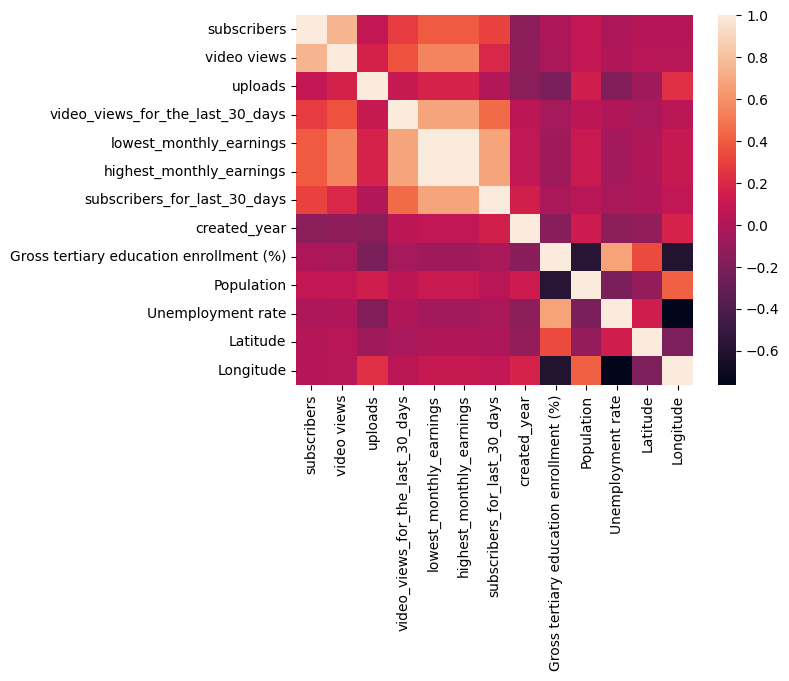

In [37]:
sns.heatmap(df.corr(numeric_only=True))

No gráfico acima, podemos observar a correlação geral entre os diferentes dados estatísticos. A partir disso, podemos inferir algumas ideias:
- a correlação entre menor ganho mensal e maior ganho mensal é fortíssima, e isso indica que não há variações tão absurdas entre os dois valores em um mesmo canal. 
- forte relação entre as visualizações de vídeo com os ganhos mensais 
- relação não tão forte entre as inscrições com os ganhos mensais 
- relação forte entre número de visualizações e inscritos
- surpreendentemente, o número de uploads não parece ter grande interferência em nada
- relação inversamente proporcional entre população de um país e ingresso em educação de terceiro grau

## Inscrições X visualizações X categorias

In [38]:
categorias = df[['category']]
categorias = categorias.drop_duplicates(subset=['category'])
categorias

,category
0,Music
1,Film & Animation
2,Entertainment
3,Education
4,Shows
5,NaN
6,People & Blogs
7,Gaming
11,Sports
16,Howto & Style


In [39]:

while True:
  try:
    categoria = input("Digite a categoria (em inglês) que deseja visualizar, ou vazio para ver todas: ")
    if (categoria in df['category'].unique()) or (categoria == ""):
      break
    print("Insira uma categoria válida")
  except ValueError:
    print("Insira uma categoria, por favor")
    continue

In [40]:
if categoria == "":
  df_filtrada = df
else: 
  df_filtrada = df[df['category'] == categoria]

In [41]:
fig = px.scatter(df_filtrada, x='video views', y='subscribers', color="category", hover_data=["Youtuber"])
fig.show()

Observando mais de perto a área de maior concentração:

In [42]:
df_concentrada = df_filtrada[(df_filtrada["video views"] < 50000000000) & (df_filtrada["subscribers"] < 100000000)]

In [43]:
fig = px.scatter(df_concentrada, x='video views', y='subscribers', color="category", hover_data=["Youtuber"])
fig.show()

Nesse gráfico (versão com todas as categorias), conseguimos chegar a conclusão que existem categorias que possuem proporcionalmente mais visualizações do que inscritos, e vice versa. 

Por exemplo: as categorias "Sports", "News & Politics" e "People & Blogs", que podem ser considerados conteúdos muito "do momento", se destacam mais em termos de visualizações do que inscrições. Enquanto categorias mais relacionadas a interesses como "Entertainment", "Gaming" e "Comedy" apresentam uma dispersão maior, o que indica que possui mais inscrições do que as categorias anteriores.


## Categorias X países

Análise de similaridade de categorias entre países

In [44]:
df_cross = pd.crosstab(df["Country"], df["category"])
df_cross.head(10)

category,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Trailers,Travel & Events
Country,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Argentina,0,3,1,3,1,1,0,0,4,0,0,0,0,0,0,0,0,0
Australia,0,0,1,0,0,3,2,0,2,0,0,0,0,0,0,1,0,0
Bangladesh,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Barbados,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brazil,1,8,0,14,7,6,2,0,16,0,1,6,0,0,0,1,0,0
Canada,0,1,1,2,0,4,0,0,5,0,0,0,0,2,0,0,0,0
Chile,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df_corr = df_cross.corr()
df_corr

category,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Trailers,Travel & Events
category,,,,,,,,,,,,,,,,,,
Autos & Vehicles,1.000000,0.165243,-0.055575,0.047720,0.232269,0.096292,0.032204,-0.029775,0.079286,-0.062938,0.478723,0.065424,-0.040284,-0.059928,-0.055187,0.072000,-0.029775,-0.029775
Comedy,0.165243,1.000000,0.934231,0.963624,0.968459,0.775851,0.916851,0.540066,0.938349,0.769516,0.719103,0.902488,0.680754,0.888903,0.869885,0.713738,0.540066,0.060258
Education,-0.055575,0.934231,1.000000,0.957201,0.891003,0.698036,0.902388,0.641614,0.882778,0.858326,0.495540,0.892673,0.643022,0.926144,0.929953,0.638493,0.641614,0.051848
Entertainment,0.047720,0.963624,0.957201,1.000000,0.932142,0.801385,0.923088,0.511630,0.952855,0.796019,0.659264,0.941406,0.754650,0.914932,0.899698,0.730817,0.511630,0.045975
Film & Animation,0.232269,0.968459,0.891003,0.932142,1.000000,0.708790,0.868822,0.603300,0.895996,0.787896,0.736232,0.851455,0.630708,0.843631,0.873110,0.641304,0.603300,0.015592
Gaming,0.096292,0.775851,0.698036,0.801385,0.708790,1.000000,0.828043,0.012656,0.888910,0.361889,0.747992,0.852177,0.889073,0.754809,0.581276,0.939753,0.012656,0.049136
Howto & Style,0.032204,0.916851,0.902388,0.923088,0.868822,0.828043,1.000000,0.390575,0.917265,0.681976,0.663402,0.917416,0.760809,0.855254,0.814878,0.782763,0.390575,0.243358
Movies,-0.029775,0.540066,0.641614,0.511630,0.603300,0.012656,0.390575,1.000000,0.326025,0.868898,-0.029775,0.313973,-0.028187,0.505974,0.749758,-0.041049,1.000000,-0.020833
Music,0.079286,0.938349,0.882778,0.952855,0.895996,0.888910,0.917265,0.326025,1.000000,0.642021,0.751342,0.928592,0.865243,0.903397,0.811231,0.836237,0.326025,-0.021823


In [46]:
df_corr = df_corr.style.background_gradient(cmap="RdBu")
df_corr

category,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Trailers,Travel & Events
category,,,,,,,,,,,,,,,,,,
Autos & Vehicles,1.000000,0.165243,-0.055575,0.047720,0.232269,0.096292,0.032204,-0.029775,0.079286,-0.062938,0.478723,0.065424,-0.040284,-0.059928,-0.055187,0.072000,-0.029775,-0.029775
Comedy,0.165243,1.000000,0.934231,0.963624,0.968459,0.775851,0.916851,0.540066,0.938349,0.769516,0.719103,0.902488,0.680754,0.888903,0.869885,0.713738,0.540066,0.060258
Education,-0.055575,0.934231,1.000000,0.957201,0.891003,0.698036,0.902388,0.641614,0.882778,0.858326,0.495540,0.892673,0.643022,0.926144,0.929953,0.638493,0.641614,0.051848
Entertainment,0.047720,0.963624,0.957201,1.000000,0.932142,0.801385,0.923088,0.511630,0.952855,0.796019,0.659264,0.941406,0.754650,0.914932,0.899698,0.730817,0.511630,0.045975
Film & Animation,0.232269,0.968459,0.891003,0.932142,1.000000,0.708790,0.868822,0.603300,0.895996,0.787896,0.736232,0.851455,0.630708,0.843631,0.873110,0.641304,0.603300,0.015592
Gaming,0.096292,0.775851,0.698036,0.801385,0.708790,1.000000,0.828043,0.012656,0.888910,0.361889,0.747992,0.852177,0.889073,0.754809,0.581276,0.939753,0.012656,0.049136
Howto & Style,0.032204,0.916851,0.902388,0.923088,0.868822,0.828043,1.000000,0.390575,0.917265,0.681976,0.663402,0.917416,0.760809,0.855254,0.814878,0.782763,0.390575,0.243358
Movies,-0.029775,0.540066,0.641614,0.511630,0.603300,0.012656,0.390575,1.000000,0.326025,0.868898,-0.029775,0.313973,-0.028187,0.505974,0.749758,-0.041049,1.000000,-0.020833
Music,0.079286,0.938349,0.882778,0.952855,0.895996,0.888910,0.917265,0.326025,1.000000,0.642021,0.751342,0.928592,0.865243,0.903397,0.811231,0.836237,0.326025,-0.021823


Com essa análise de similaridade, conseguimos observar quais categorias possuem um público similar entre si, em questão de países. Podemos observar uma forte correlação entre:
- Música tem públicos em comum com várias outras categorias, mostrando ser "universal" de certa forma. (relação com Entretenimento, Comédia, Pessoas & Blogs, Tutoriais, Tecnologia, e vários outros)
- Correlação forte entre Filmes e Trailers, por ser na mesma área de interesse
- Esportes tem uma boa relação com Videogame, aparentando ser um público similar.

### Categorias do país

In [47]:
paises = df[['Country']]
paises = paises.drop_duplicates(subset=['Country'])
paises

,Country
0,India
1,United States
5,NaN
7,Japan
8,Russia
13,South Korea
16,United Kingdom
19,Canada
23,Brazil
31,Argentina


In [48]:
while True:
  try:
    pais = input("Digite um país (em inglês) que deseja visualizar, ou vazio para ver todos: ")
    if (pais in df['Country'].unique()) or (pais == ""):
      break
    print("Insira um país válido")
  except ValueError:
    print("Insira um país, por favor")
    continue

In [49]:
if pais == "":
  df_filtrada = df
else: 
  df_filtrada = df[df['Country'] == pais]

<Axes: xlabel='COUNT', ylabel='category'>

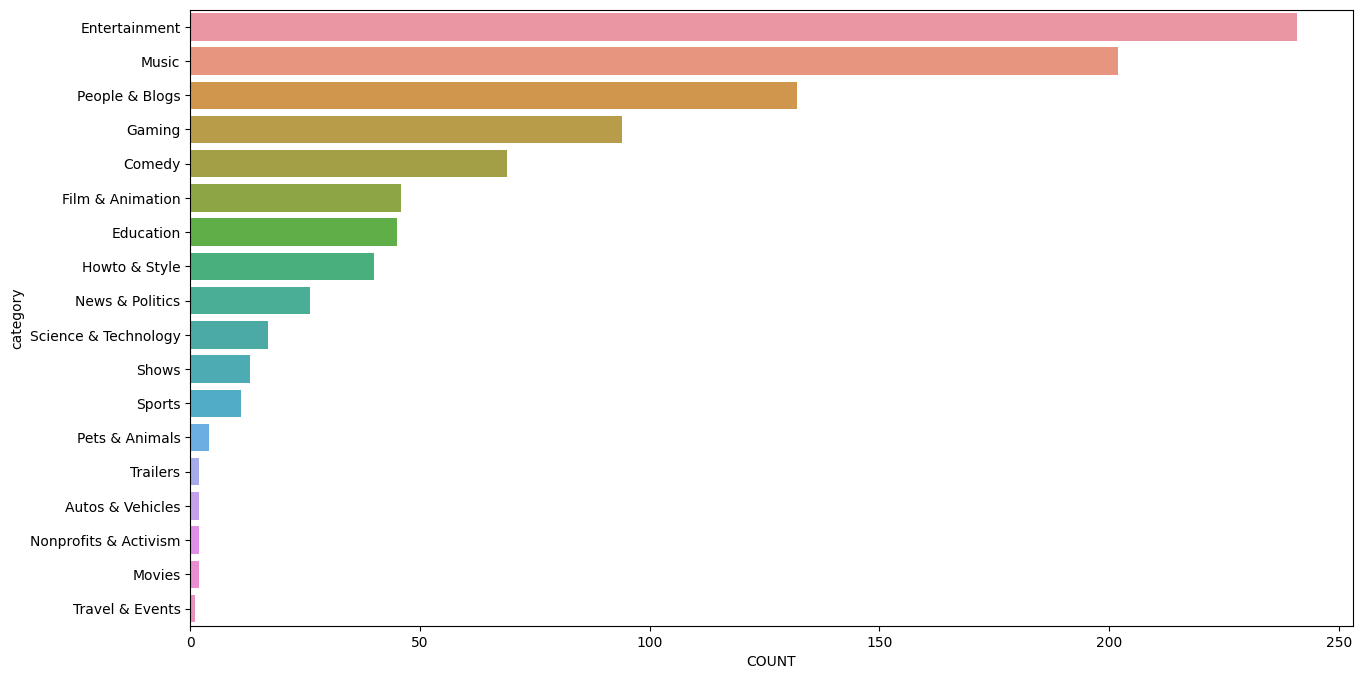

In [50]:
dfgraph = df_filtrada.groupby(['category']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="category", orient="h")

## Canais criados por ano

In [51]:
df_23 = df[df['created_year'] == 2023]
df_23

,Youtuber,subscribers,video views,category,uploads,Country,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude


In [52]:
fig = px.histogram(df, x="created_year")
fig.update_layout(bargap=0.2)
fig.show()

In [53]:
df[df['created_year'] < 2000]

,Youtuber,subscribers,video views,category,uploads,Country,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
101,YouTube,36300000,3.010785e+09,News & Politics,744,United States,21103000.0,5300.0,84400.0,300000.0,1970.0,88.2,328239523.0,14.7,37.09024,-95.712891


In [62]:
df_anos = df[df['created_year'] > 2000]

In [65]:
fig = px.scatter(df_anos, x='video views', y='highest_monthly_earnings', color="created_year", hover_data=["Youtuber", "Country", "category"])
fig.show()